In [1]:
import pandas as pd
import numpy as np
from DataManagement.data_manager import DataManager
from constants import ATR_ABNORMALITY_COLUMN
data_manager = DataManager()

In [2]:
btc_1d_df = data_manager.get_historical_data_DataFrame("BTCUSDT", kline_size="1d")

In [3]:
btc_abnormal_index = btc_1d_df[btc_1d_df["atr_abnormality"]==1].index

In [4]:
def read_csv_wrapper(filepath) -> pd.DataFrame:
    df = pd.read_csv(filepath, index_col = 0)
    df.set_index(pd.to_datetime(df.index), inplace = True)
    return df


In [5]:
joint_entropy_df = read_csv_wrapper("results/09-02-2021__14:51:26/JointEntropy.csv")

In [6]:
transfer_entropy_df = read_csv_wrapper("results/09-02-2021__14:51:26/TransferEntropy.csv")

In [7]:
transfer_entropy_df_guy = read_csv_wrapper("results/09-02-2021__14:53:22/TransferEntropy.csv")

In [8]:
joint_entropy_df_guy = read_csv_wrapper("results/09-02-2021__14:53:22/JointEntropy.csv")

In [9]:
# transfer_entropy_df_guy.plot(subplots = True, figsize = (15,60));

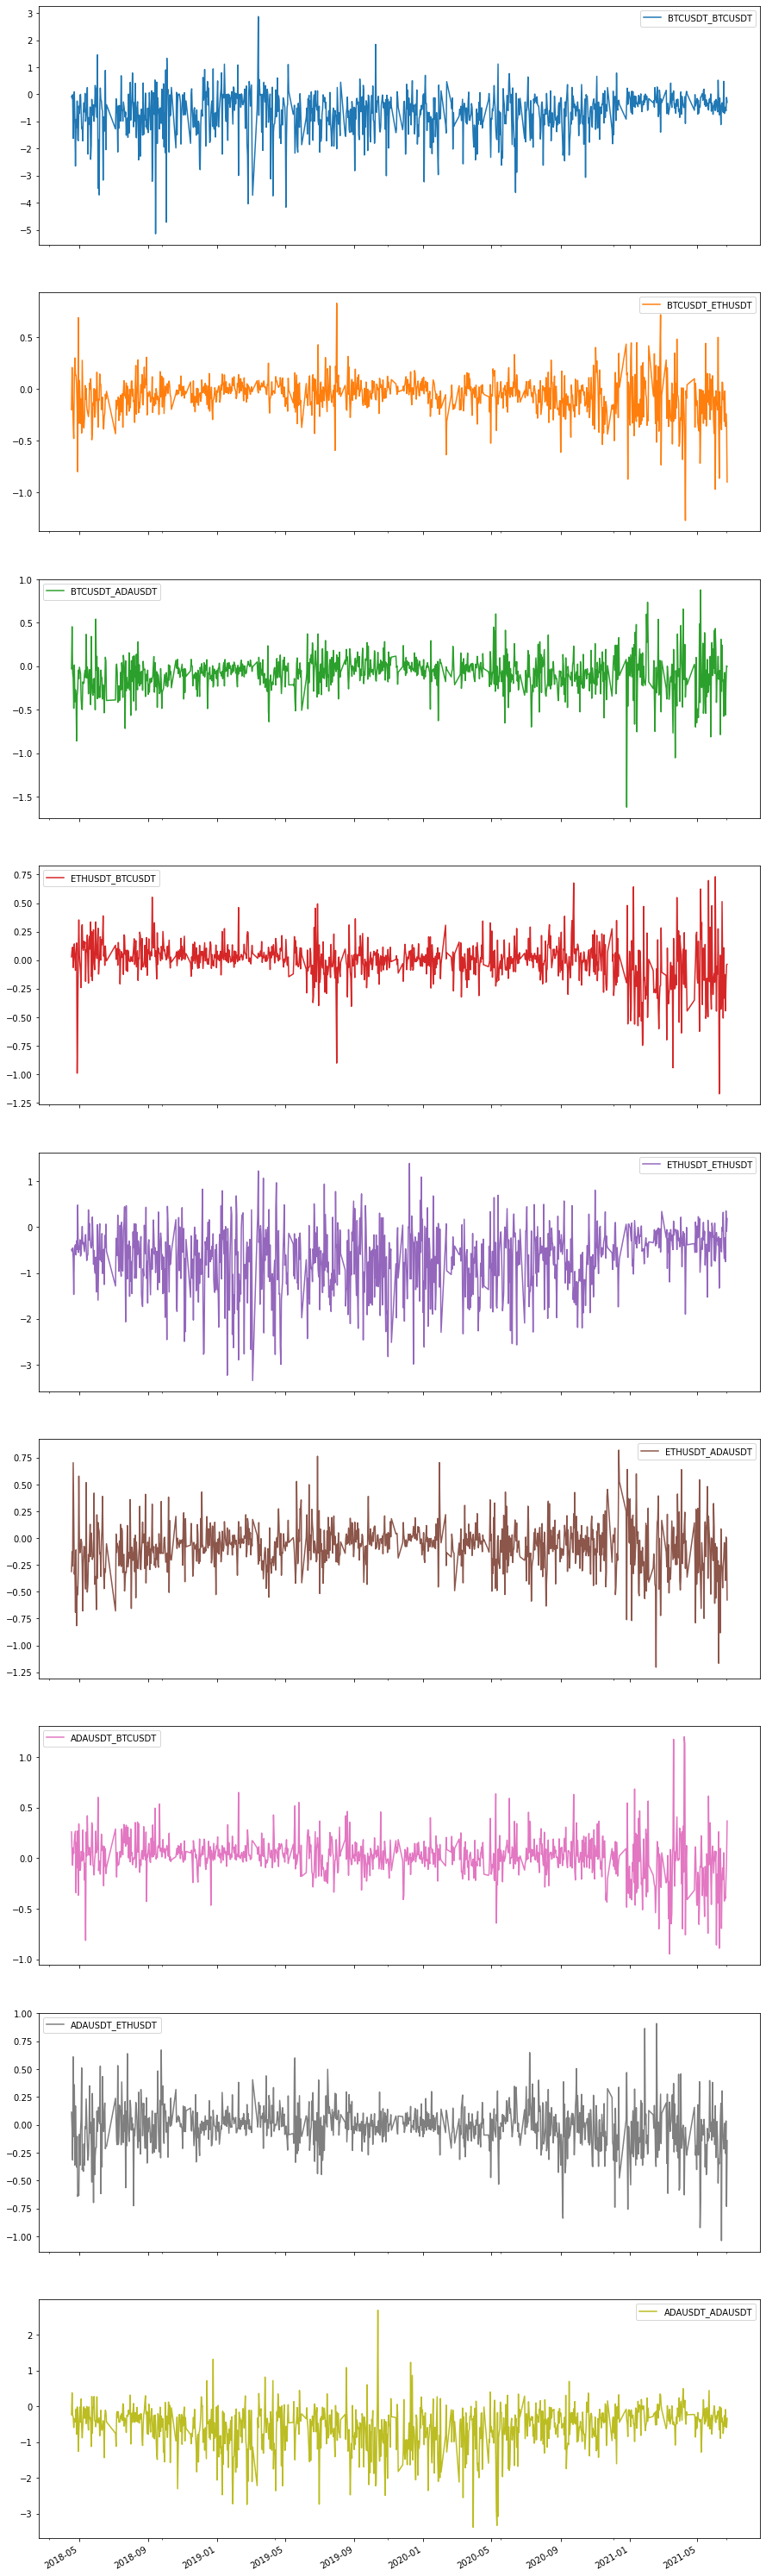

In [10]:
transfer_entropy_df.plot(subplots = True, figsize = (15,60));

In [11]:
divided_df = transfer_entropy_df/joint_entropy_df

In [12]:
divided_df_guy = transfer_entropy_df_guy/joint_entropy_df_guy

In [13]:
# joint_entropy_df.abs().min()

In [14]:
# divided_df.index

In [15]:
new_index = joint_entropy_df[joint_entropy_df.abs() >= 1].dropna(how="any").index

In [31]:
divided_df.loc[new_index];

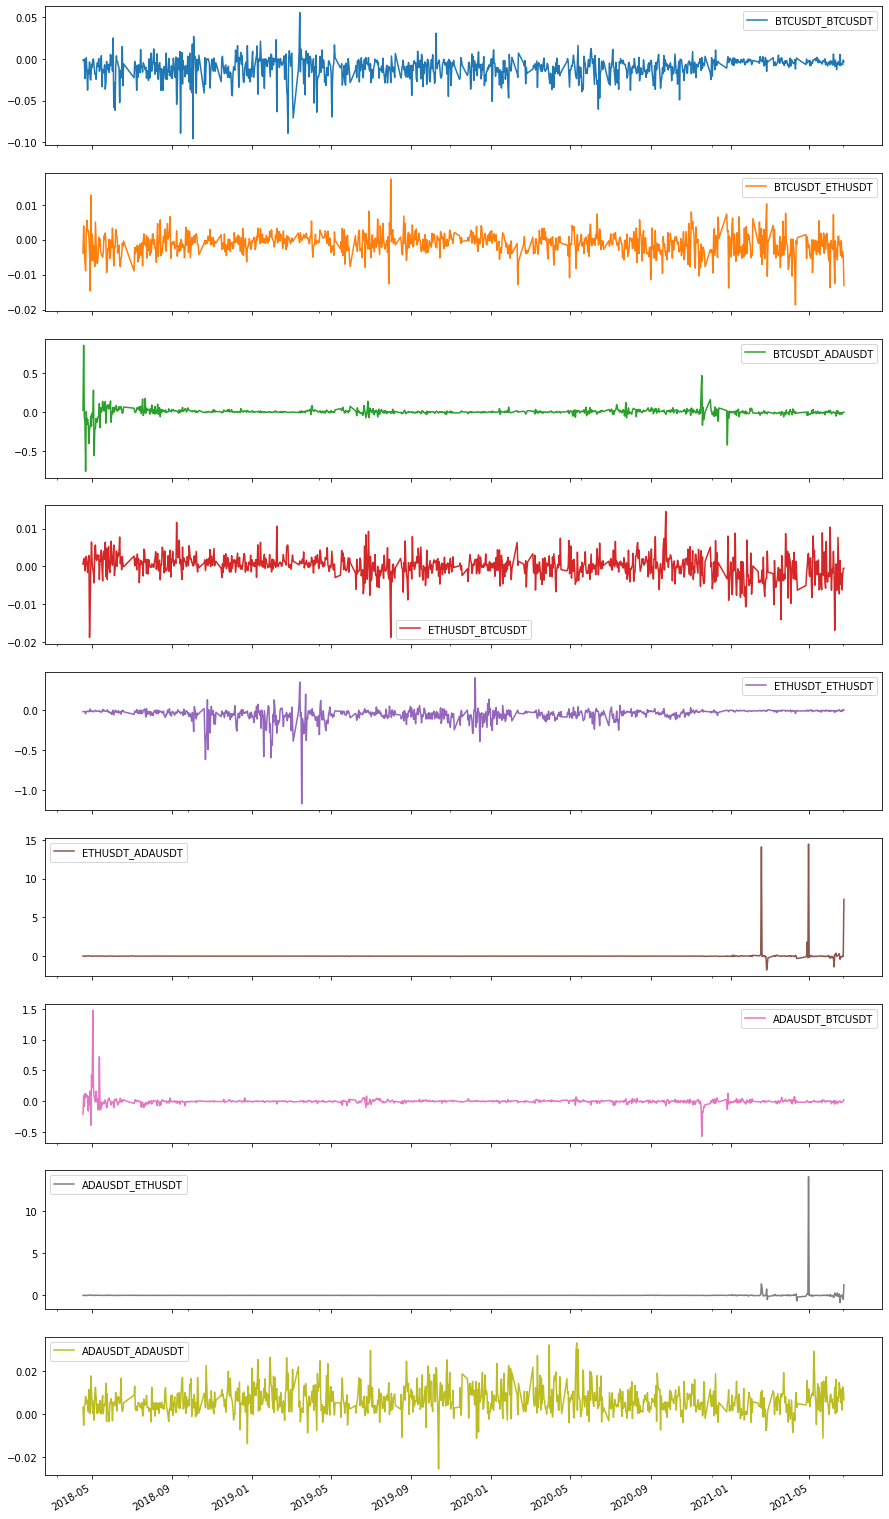

In [17]:
divided_df.plot(subplots=True, figsize= (15,30));

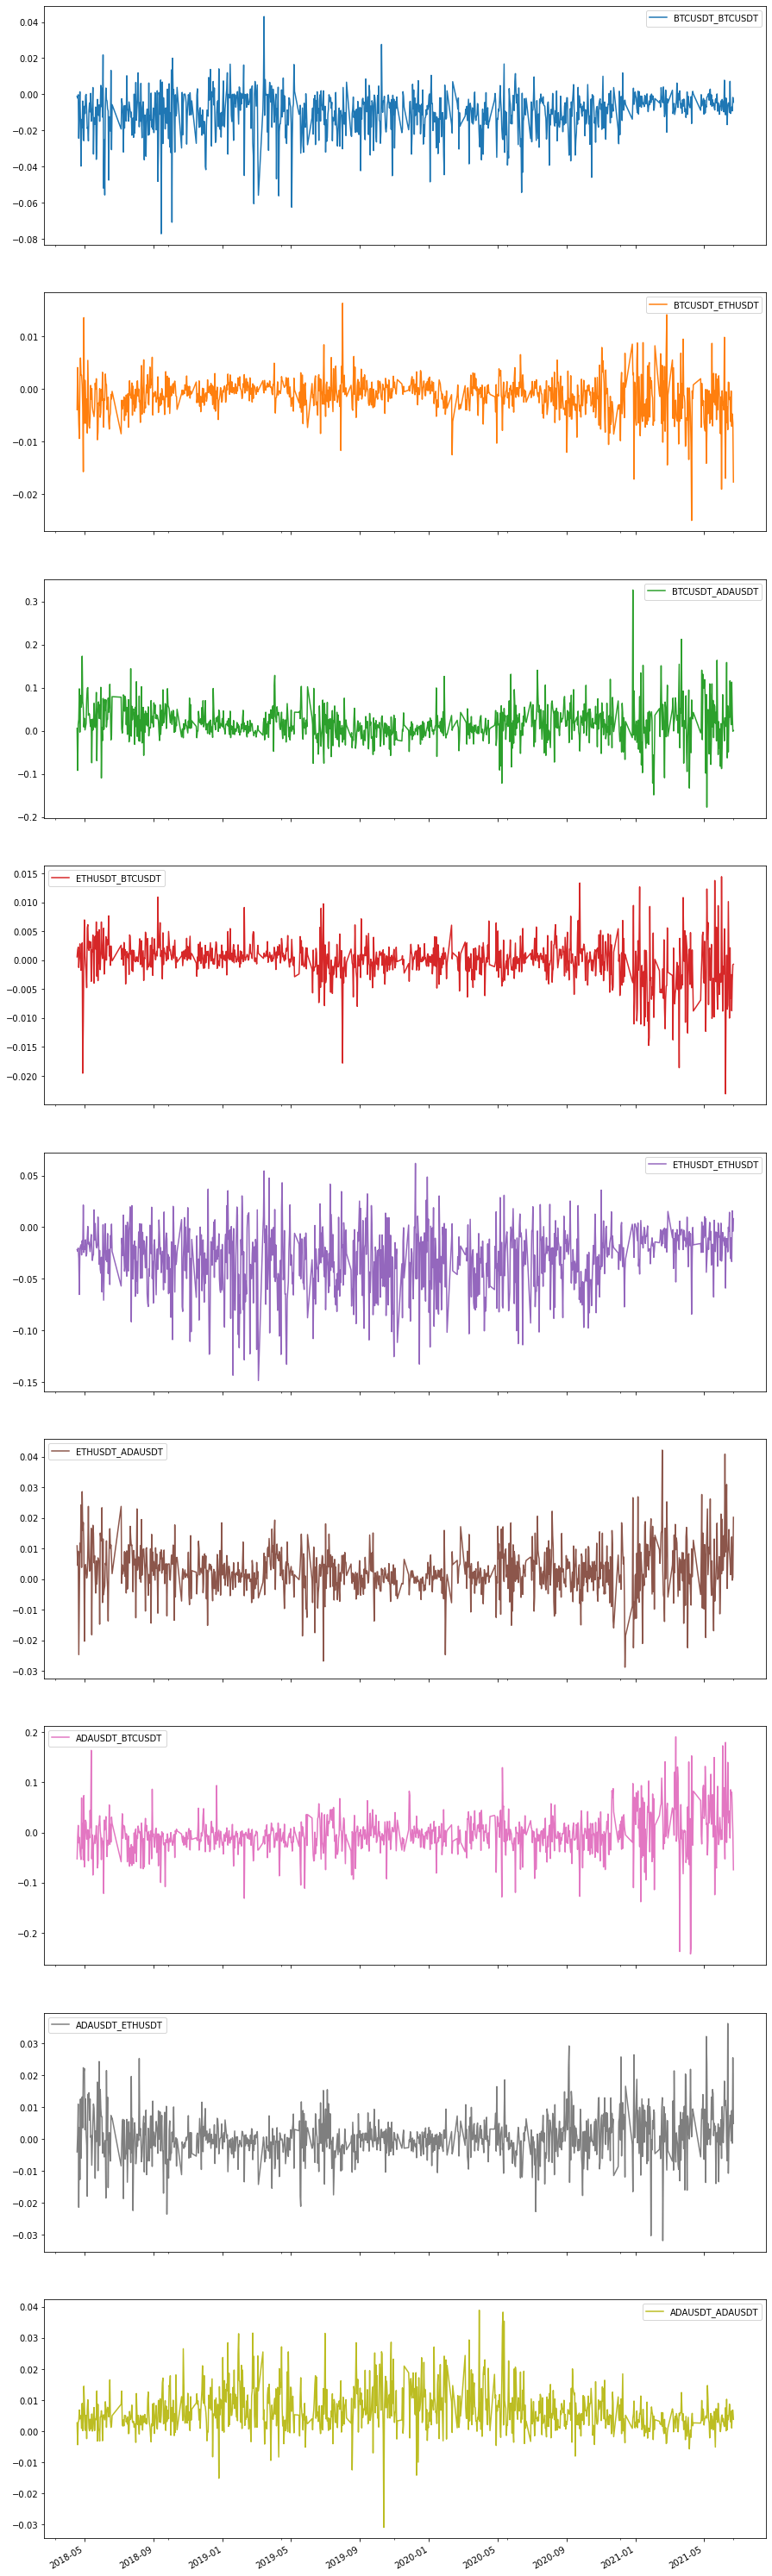

In [18]:
test_df = transfer_entropy_df/joint_entropy_df.mean()
test_df.plot(subplots=True, figsize= (15,60));

In [19]:
def get_max_timestamp(col):
    index_index = divided_df[col].argmax()
    return divided_df.index[index_index]


In [20]:
pair = "ADAUSDT_ETHUSDT"

In [21]:
max_timestamp = get_max_timestamp(pair)

In [22]:
joint_entropy_df.loc[max_timestamp][pair]

-0.0285131543105947

In [23]:
joint_entropy_df.abs().min()[pair]

0.0285131543105947

In [24]:
transfer_entropy_df.loc[max_timestamp]["ADAUSDT_ETHUSDT"]

-0.4007663430806474

In [25]:
-0.4/-0.02

20.0

In [26]:
btc_abnormal_index = [abnormal for abnormal in btc_abnormal_index if abnormal in divided_df.index]

In [27]:
abnormal_divided_df = divided_df.loc[btc_abnormal_index]

In [28]:
abnormal_divided_df_guy = divided_df_guy.loc[btc_abnormal_index]

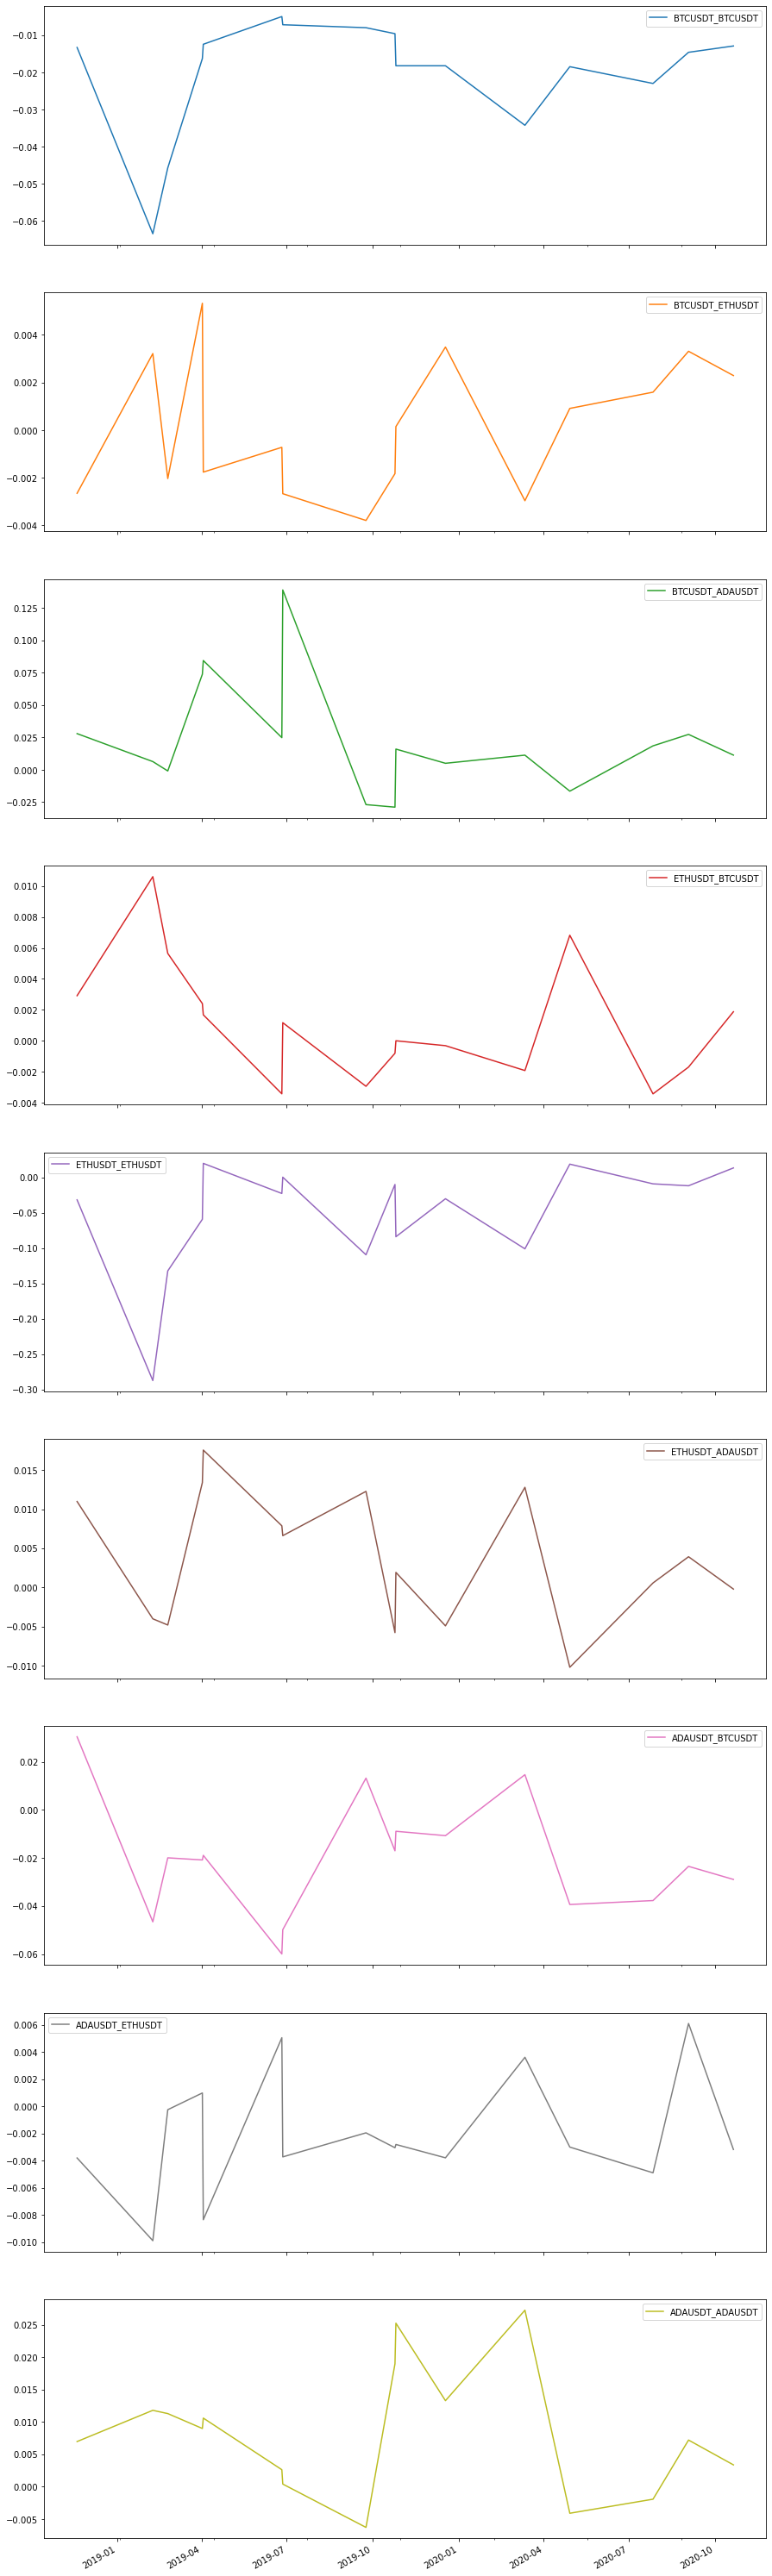

In [29]:
abnormal_divided_df.plot(subplots = True, figsize = (15,60));

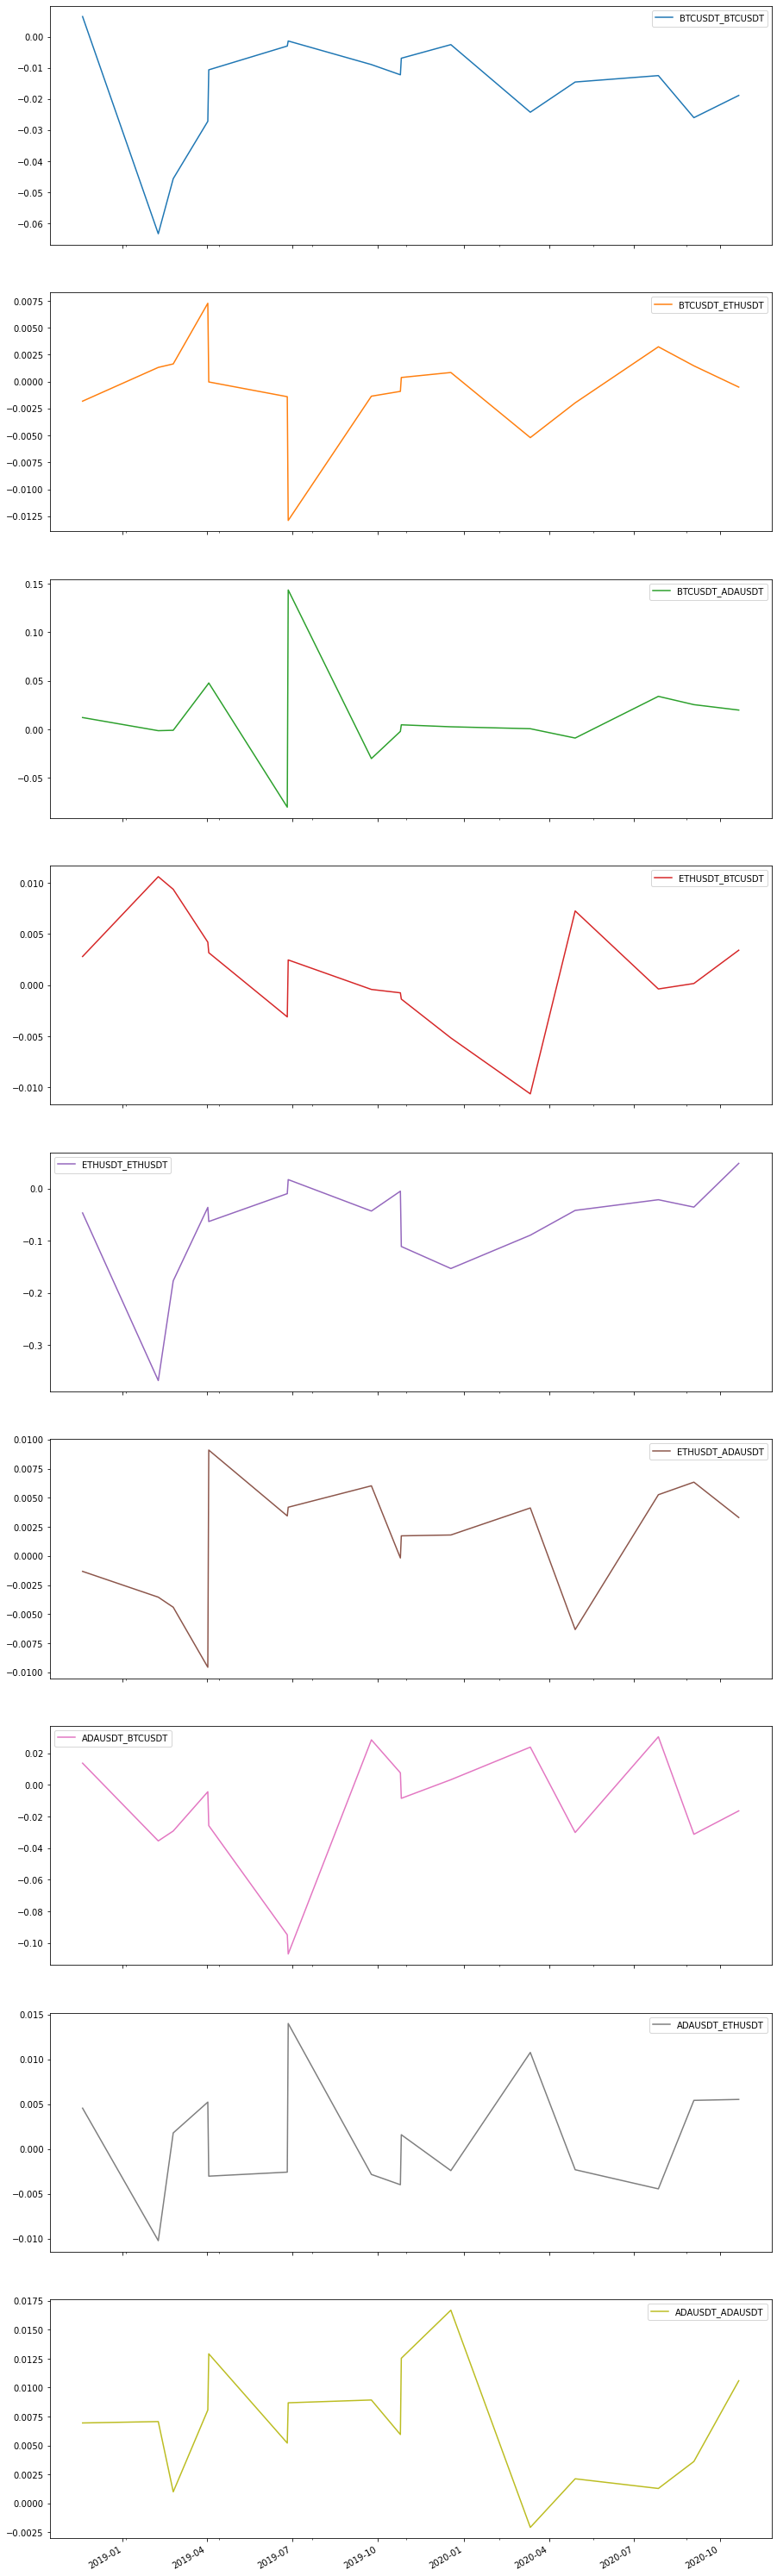

In [30]:
abnormal_divided_df_guy.plot(subplots = True, figsize = (15,60));